# Author: Bakki Akhil

### The main aim of this project is to do Exploratory data analysis for details mentioned in Hospital dataset
### Here in this project we will analysis using the plots between different variables and comparing among them
### In this project we will be building Multiple linear regression to estimate the relationship between explanatory (independent) variables and response (dependent) variable. This helps in finding the score of how much prediction is nearer to the actual value

In [1]:
# Here we will be importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
# here we are importing the dataset of Mission Hospital
input_data = pd.read_csv("D:\\Akhil MBA\\MBA 3 Trimester\\Statistical Modeling using R\\Mission_Hospital.csv")

In [3]:
# the top 5 rows of the above dataset
input_data.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,...,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,...,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,...,ELECTIVE,362231.0,390000,30000,360000,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,...,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,...,EMERGENCY,444876.0,254673,10000,244673,24,12,12,N,0


In [4]:
input_data.shape

(248, 27)

In [5]:
# this specifies the NaN or null values present in the dataset
input_data.isnull().sum()

SL.                                     0
AGE                                     0
GENDER                                  0
MARITAL STATUS                          0
KEY COMPLAINTS -CODE                   36
BODY WEIGHT                             0
BODY HEIGHT                             0
HR PULSE                                0
BP -HIGH                               23
BP-LOW                                 23
RR                                      0
PAST MEDICAL HISTORY CODE             173
HB                                      2
UREA                                   13
CREATININE                             33
MODE OF ARRIVAL                         0
STATE AT THE TIME OF ARRIVAL            0
TYPE OF ADMSN                           0
TOTAL COST TO HOSPITAL                  0
TOTAL AMOUNT BILLED TO THE PATIENT      0
CONCESSION                              0
ACTUAL RECEIVABLE AMOUNT                0
TOTAL LENGTH OF STAY                    0
LENGTH OF STAY - ICU              

In [6]:
# here we are describing the dataset for more insight
input_data.describe()

,SL.,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,225.000000,225.000000,248.000000,246.000000,235.000000,215.000000,248.000000,248.0000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879839,37.536290,130.221774,92.229839,115.022222,71.875556,23.540323,12.934959,26.581702,0.746977,198723.330282,182721.3750,17642.818548,167894.399194,11.612903,3.475806,8.153226,8544.201613
std,71.735626,25.899358,23.122248,39.170901,20.308740,22.536368,15.313176,3.840756,3.099019,15.998367,0.548641,122587.492984,102104.1345,19992.417896,109345.870984,5.392617,3.853520,3.755793,21521.877503
min,1.000000,0.030000,2.000000,19.000000,41.000000,70.000000,39.000000,12.000000,5.000000,2.000000,0.100000,46093.000000,43641.0000,0.000000,31000.000000,3.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,15.000000,105.000000,78.000000,100.000000,60.000000,22.000000,11.000000,18.000000,0.300000,131652.750000,150000.0000,0.000000,112500.000000,8.000000,1.000000,6.000000,0.000000
50%,124.500000,15.500000,41.000000,147.500000,90.000000,110.000000,70.000000,24.000000,12.000000,22.000000,0.700000,162660.500000,150000.0000,10000.000000,122400.000000,10.000000,2.000000,7.000000,0.000000
75%,186.250000,55.000000,58.250000,160.000000,104.000000,130.000000,80.000000,24.000000,14.000000,30.000000,1.000000,220614.000000,202638.5000,37500.000000,197000.000000,13.000000,4.000000,10.000000,0.000000
max,248.000000,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.000000,26.000000,143.000000,5.200000,887350.000000,944819.0000,123132.000000,848397.000000,41.000000,30.000000,22.000000,196848.000000


<AxesSubplot:>

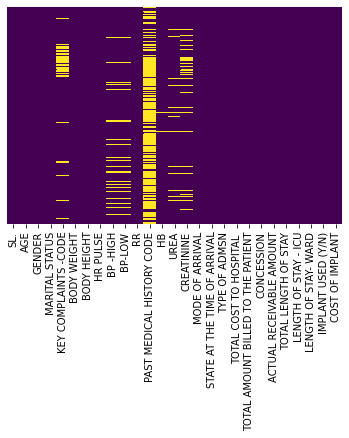

In [7]:
# PLoting sns to find out the missing observations and coloured elements specifies the missing observations
sns.heatmap(input_data.isnull(),yticklabels=False, cbar = False, cmap= 'viridis')

In [8]:
# replacing the NaN values with none for categorical variables and means values for scalar variables and storing the resultant in new variable
new_data = input_data.fillna({
    "KEY COMPLAINTS -CODE" : "None",
    "BP -HIGH" : 115.022222,
    "BP-LOW" : 71.875556,
    "PAST MEDICAL HISTORY CODE" : "None",
    "HB" : 12.934959,
    "UREA" : 26.581702,
    "CREATININE" : 0.746977
    
})

In [9]:
# The top 5 rows of the new dataset
new_data.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49,160,118,100.0,80.0,...,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41,155,78,70.0,50.0,...,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,47,164,100,110.0,80.0,...,ELECTIVE,362231.0,390000,30000,360000,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80,173,122,110.0,80.0,...,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58,175,72,180.0,100.0,...,EMERGENCY,444876.0,254673,10000,244673,24,12,12,N,0


In [10]:
# Here we can observe that all the NaN or null values are removed/replaced in the new dataset
new_data.isnull().sum()

SL.                                   0
AGE                                   0
GENDER                                0
MARITAL STATUS                        0
KEY COMPLAINTS -CODE                  0
BODY WEIGHT                           0
BODY HEIGHT                           0
HR PULSE                              0
BP -HIGH                              0
BP-LOW                                0
RR                                    0
PAST MEDICAL HISTORY CODE             0
HB                                    0
UREA                                  0
CREATININE                            0
MODE OF ARRIVAL                       0
STATE AT THE TIME OF ARRIVAL          0
TYPE OF ADMSN                         0
TOTAL COST TO HOSPITAL                0
TOTAL AMOUNT BILLED TO THE PATIENT    0
CONCESSION                            0
ACTUAL RECEIVABLE AMOUNT              0
TOTAL LENGTH OF STAY                  0
LENGTH OF STAY - ICU                  0
LENGTH OF STAY- WARD                  0


<AxesSubplot:>

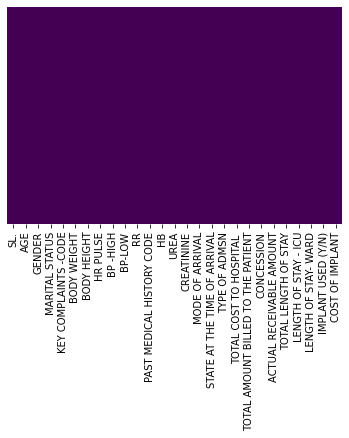

In [11]:
# PLoting sns to find out the missing observations and the graph indicates that there are no null values 
sns.heatmap(new_data.isnull(),yticklabels=False, cbar = False, cmap= 'viridis')

<AxesSubplot:xlabel='GENDER', ylabel='count'>

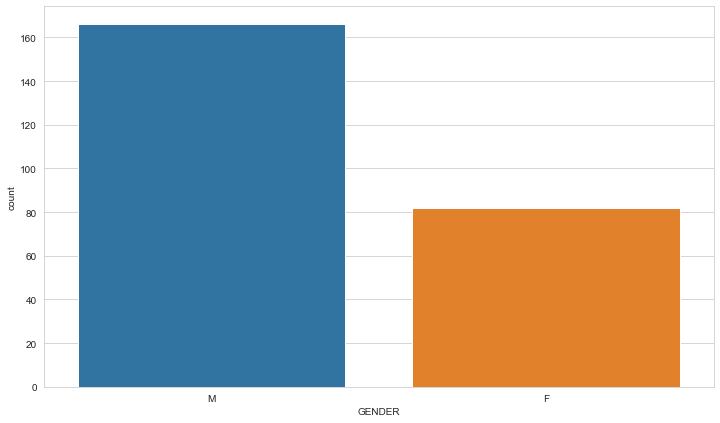

In [12]:
# ploting the graph for gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.countplot(data = new_data, x = "GENDER")

<Figure size 864x504 with 0 Axes>

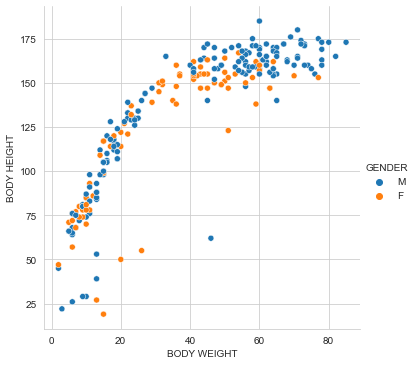

In [13]:
# ploting the graph comparing body weight and body height with gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.relplot(data = new_data, x = "BODY WEIGHT", y = "BODY HEIGHT", hue = "GENDER")

<Figure size 864x504 with 0 Axes>

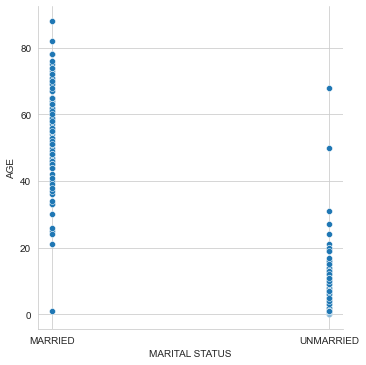

In [14]:
# ploting the graph comparing marital status and age
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.relplot(data = new_data, x = "MARITAL STATUS", y = "AGE")

<Figure size 864x504 with 0 Axes>

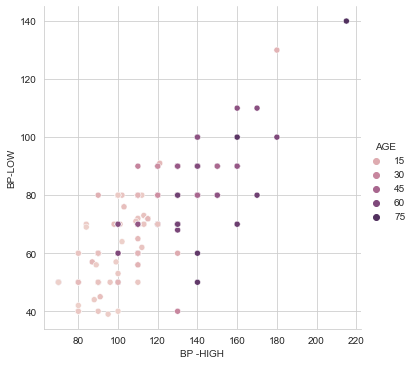

In [15]:
# ploting the graph comparing BP-High and BP-Low with Age
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.relplot(data = new_data, x = "BP -HIGH", y = "BP-LOW", hue = "AGE")

<Figure size 864x504 with 0 Axes>

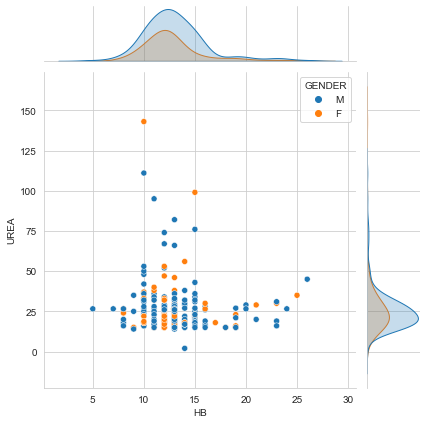

In [16]:
# ploting the graph comparing HB and Urea with gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.jointplot(data = new_data, x = "HB", y = "UREA",hue = "GENDER")

<AxesSubplot:xlabel='CREATININE', ylabel='RR'>

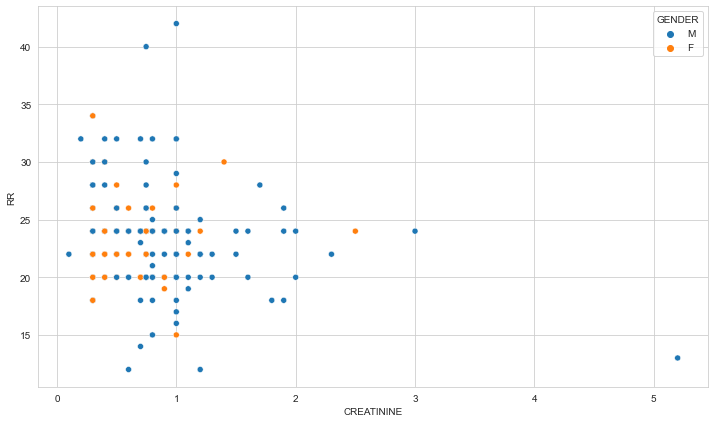

In [17]:
# ploting the graph comparing Creatinine and RR with gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.scatterplot(data = new_data, x = "CREATININE", y = "RR", hue = "GENDER")

<AxesSubplot:xlabel='TOTAL AMOUNT BILLED TO THE PATIENT', ylabel='CONCESSION'>

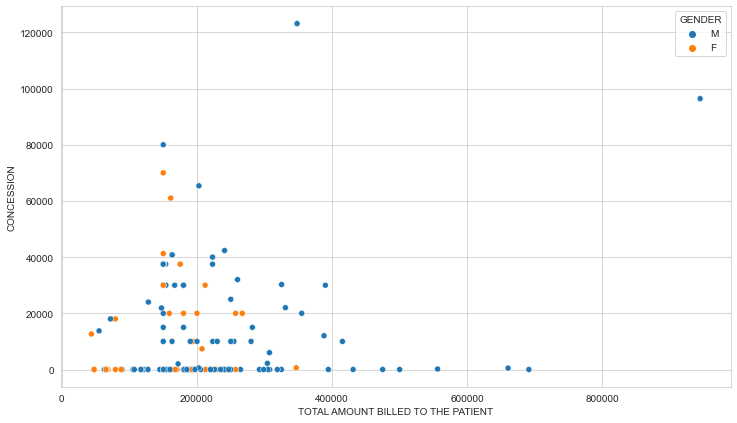

In [18]:
# ploting the graph comparing Total amount billed to the patient and concession with gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.scatterplot(data = new_data, x = "TOTAL AMOUNT BILLED TO THE PATIENT", y = "CONCESSION", hue = "GENDER")

<AxesSubplot:xlabel='LENGTH OF STAY - ICU', ylabel='LENGTH OF STAY- WARD'>

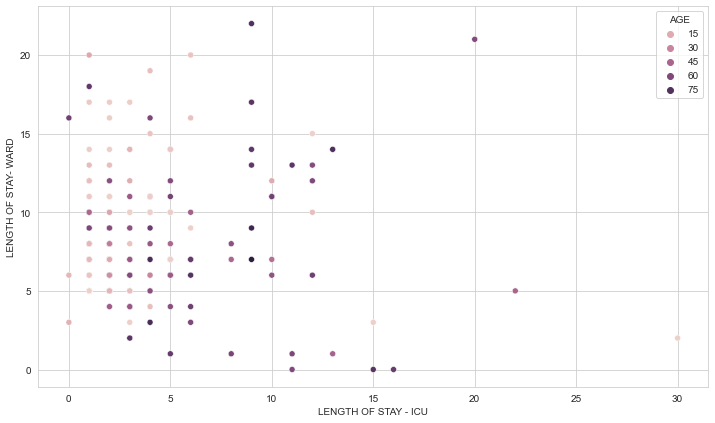

In [19]:
# ploting the graph comparing lenght of stay(ICU) and leght of stay(Ward) with age
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.scatterplot(data = new_data, x = "LENGTH OF STAY - ICU", y = "LENGTH OF STAY- WARD", hue = "AGE")

<AxesSubplot:xlabel='TOTAL AMOUNT BILLED TO THE PATIENT', ylabel='ACTUAL RECEIVABLE AMOUNT'>

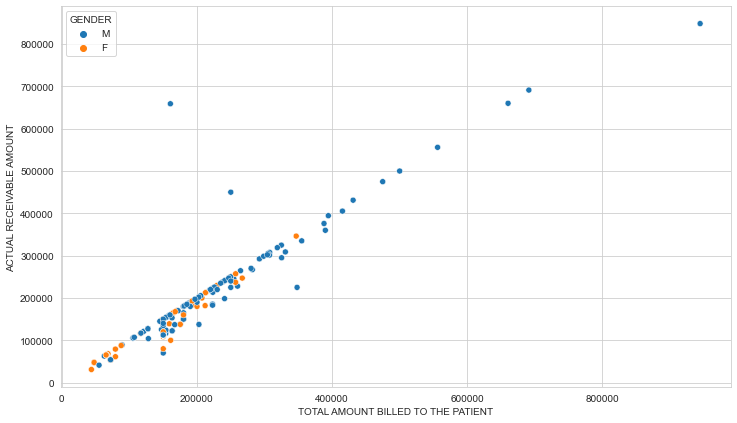

In [20]:
# ploting the graph comparing total amount billed and actual receivable amount to the hospital with gender
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
sns.scatterplot(data = new_data, x = "TOTAL AMOUNT BILLED TO THE PATIENT", y = "ACTUAL RECEIVABLE AMOUNT", hue = "GENDER")

# Multiple linear regression
### Here below we will be doing Multiple linear regression for the same data comparing between Independent variables(AGE, HR.PULSE, BP..HIGH, HB, UREA, CREATININE, TOTAL.LENGTH.OF.STAY) with dependent variable(TOTAL.COST.TO.HOSPITAL)

In [21]:
# importing the dataset, usecols is used to select specific columns from the dataset
reg_data = pd.read_csv("D:\\Akhil MBA\\MBA 3 Trimester\\Statistical Modeling using R\\Mission_Hospital.csv",
                       usecols= [1,7,8,12,13,14,18,22])
reg_data.head()

,AGE,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY
0,58.0,118,100.0,11.0,33.0,0.8,660293.0,25
1,59.0,78,70.0,11.0,95.0,1.7,809130.0,41
2,82.0,100,110.0,12.0,15.0,0.8,362231.0,18
3,46.0,122,110.0,12.0,74.0,1.5,629990.0,14
4,60.0,72,180.0,10.0,48.0,1.9,444876.0,24


In [22]:
# checking for null values
reg_data.isnull().sum()

AGE                         0
HR PULSE                    0
BP -HIGH                   23
HB                          2
UREA                       13
CREATININE                 33
TOTAL COST TO HOSPITAL      0
TOTAL LENGTH OF STAY        0
dtype: int64

In [23]:
# updating by removing the null values
reg_data = reg_data.fillna({
    "BP -HIGH" : 115.022222,
    "HB" : 12.934959,
    "UREA" : 26.581702,
    "CREATININE" : 0.746977
    
})

In [24]:
# checking for null values
reg_data.isnull().sum()

AGE                        0
HR PULSE                   0
BP -HIGH                   0
HB                         0
UREA                       0
CREATININE                 0
TOTAL COST TO HOSPITAL     0
TOTAL LENGTH OF STAY       0
dtype: int64

In [25]:
# checking for the data
reg_data.head()

,AGE,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY
0,58.0,118,100.0,11.0,33.0,0.8,660293.0,25
1,59.0,78,70.0,11.0,95.0,1.7,809130.0,41
2,82.0,100,110.0,12.0,15.0,0.8,362231.0,18
3,46.0,122,110.0,12.0,74.0,1.5,629990.0,14
4,60.0,72,180.0,10.0,48.0,1.9,444876.0,24


In [26]:
# making dependent variable(Total cost to hospital) as last column
titles = list(reg_data.columns)
titles

['AGE',
 'HR PULSE',
 'BP -HIGH',
 'HB',
 'UREA',
 'CREATININE',
 'TOTAL COST TO HOSPITAL ',
 'TOTAL LENGTH OF STAY']

In [27]:
# making dependent variable(Total cost to hospital) as last column
titles[6], titles[7] = titles[7], titles[6]
titles

['AGE',
 'HR PULSE',
 'BP -HIGH',
 'HB',
 'UREA',
 'CREATININE',
 'TOTAL LENGTH OF STAY',
 'TOTAL COST TO HOSPITAL ']

In [28]:
# Arranging the data with respective to the changed columns
reg_data = reg_data[titles]
reg_data.head()

,AGE,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,TOTAL COST TO HOSPITAL
0,58.0,118,100.0,11.0,33.0,0.8,25,660293.0
1,59.0,78,70.0,11.0,95.0,1.7,41,809130.0
2,82.0,100,110.0,12.0,15.0,0.8,18,362231.0
3,46.0,122,110.0,12.0,74.0,1.5,14,629990.0
4,60.0,72,180.0,10.0,48.0,1.9,24,444876.0


### Building a prediction model and cheching with the help of r2

In [29]:
# Dividing the dataset here in x we will have Age, HR, BP, HB, Urea, Creatinine, Total length of stay
x = reg_data.iloc[:,:-1]
x.head()

,AGE,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL LENGTH OF STAY
0,58.0,118,100.0,11.0,33.0,0.8,25
1,59.0,78,70.0,11.0,95.0,1.7,41
2,82.0,100,110.0,12.0,15.0,0.8,18
3,46.0,122,110.0,12.0,74.0,1.5,14
4,60.0,72,180.0,10.0,48.0,1.9,24


In [30]:
# Making a table for output variable as total cost of the hospital
y = reg_data.iloc[:,[7]]
y.head()

,TOTAL COST TO HOSPITAL
0,660293.0
1,809130.0
2,362231.0
3,629990.0
4,444876.0


In [31]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression
# Fitting the model linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Predicting the test result and comparing it with the Y test result
Y_Prediction = regressor.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
# now comparing the Y prediction value with the test data of Y and calculating the score
# here the score is approximately as 0.40 which is less than 0.5 making the model as less suitable for any further analysis
score = r2_score(Y_test, Y_Prediction)
score

0.4015179349929371

In [35]:
# the below table shows the correlation between the independent variables
x.iloc[:,1:].corr()

,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL LENGTH OF STAY
HR PULSE,1.000000,-0.294296,0.036423,-0.023677,-0.358653,0.123733
BP -HIGH,-0.294296,1.000000,-0.058624,0.050948,0.363124,0.039549
HB,0.036423,-0.058624,1.000000,-0.066692,-0.160791,0.008306
UREA,-0.023677,0.050948,-0.066692,1.000000,0.454899,0.219651
CREATININE,-0.358653,0.363124,-0.160791,0.454899,1.000000,0.170736
TOTAL LENGTH OF STAY,0.123733,0.039549,0.008306,0.219651,0.170736,1.000000


In [37]:
# For checking the model we are building beta0(Betanot) with the help of statsmodels library
import statsmodels.api as sm
# fit a Ordinary Least square(OLS) model with intercept for beta0(Beta not)
x = sm.add_constant(x)


In [40]:
# here below we can observe that betanot has been included as const in the table
x.head()

,const,AGE,HR PULSE,BP -HIGH,HB,UREA,CREATININE,TOTAL LENGTH OF STAY
0,1.0,58.0,118,100.0,11.0,33.0,0.8,25
1,1.0,59.0,78,70.0,11.0,95.0,1.7,41
2,1.0,82.0,100,110.0,12.0,15.0,0.8,18
3,1.0,46.0,122,110.0,12.0,74.0,1.5,14
4,1.0,60.0,72,180.0,10.0,48.0,1.9,24


In [39]:
# Below we can build a model for getting the indepth analysis of the all the x variables when compared with y for building better model
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     TOTAL COST TO HOSPITAL    R-squared:                       0.585
Model:                                 OLS   Adj. R-squared:                  0.573
Method:                      Least Squares   F-statistic:                     48.41
Date:                     Mon, 17 May 2021   Prob (F-statistic):           1.71e-42
Time:                             15:24:23   Log-Likelihood:                -3147.9
No. Observations:                      248   AIC:                             6312.
Df Residuals:                          240   BIC:                             6340.
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.014e+04   4.97e+04     -1.008      0.314   -1.48e+05    4.78e+04
AGE                   1221.0576    300.778      4.060      0.000     628.555    1813.560
HR PULSE               529.7334    303.049      1.748      0.082     -67.243    1126.710
BP -HIGH              -149.6211    295.552     -0.506      0.613    -731.828     432.586
HB                    -585.5190   1679.539     -0.349      0.728   -3894.039    2723.001
UREA                   123.3834    378.778      0.326      0.745    -622.771     869.538
CREATININE             3.56e+04   1.37e+04      2.604      0.010    8673.593    6.25e+04
TOTAL LENGTH OF STAY  1.375e+04   1023.558     13.431      0.000    1.17e+04    1.58e+04
==============================================================================
Omnibus:                      159.098   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2011.062
Skew:                           2.314   Prob(JB):                         0.00
Kurtosis:                      16.161   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""